In [1]:
import glob
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
def extract_features(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.array(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=8).T)
    chroma = np.array(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T)
    mel = np.array(librosa.feature.melspectrogram(X, sr=sample_rate).T)
    contrast = np.array(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T)
    tonnetz = np.array(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T)
    return mfccs,chroma,mel,contrast,tonnetz

In [3]:
def parse_audio_files(parent_dir,sub_dirs,file_ext='*.wav'):
    ignored = 0
    features, labels, name = np.empty((0,161)), np.empty(0), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        print(sub_dir)
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            try:
                mfccs, chroma, mel, contrast, tonnetz = extract_features(fn)
                ext_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
                features = np.vstack([features,ext_features])
                l = [fn.split('-')[1]] * (mfccs.shape[0])
                labels = np.append(labels, l)
            except (KeyboardInterrupt, SystemExit):
                raise
            except:
                ignored += 1
    print ("Ignored files: ", ignored)
    return np.array(features), np.array(labels, dtype = np.int)

In [4]:
parent_dir = 'C:/Users/rano4/Desktop/5thyear/graduationproject/Project/UrbanSound8K/audio'

#sub_dirs = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']
sub_dirs = ['fold1']

try:
    labels = np.load('labels.npy')
    features = np.load('features.npy')
    print("Features and labels found!")
except:
    print("Extracting features...")
    features, labels = parse_audio_files(parent_dir,sub_dirs)
    with open('features.npy', 'wb') as f1:
            np.save(f1,features)
    with open('labels.npy', 'wb') as f2:
            np.save(f2, labels)

Features and labels found!


In [5]:
print("Splitting Data!")
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

Splitting Data!


## normalization data

In [6]:
print("normalization data")
sc = StandardScaler()
sc.fit(X_train)

normalization data


StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
with open("fit_params.npy", "wb") as f3:
    np.save(f3, X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## fitting and Training data

In [33]:
print("fitting and Training data")
clf = LogisticRegression(solver ="newton-cg" ,max_iter=1000 ,multi_class ="multinomial",C = 5)
clf.fit(X_train, y_train)


fitting and Training data


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
#import sklearn.model_selection.GridSearchCV
param_grid = {'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100],
              'solver' : ['newton-cg','lbfgs','sag','saga'],
              'max_iter' :[10,100,1000],
             }
clf = GridSearchCV(LogisticRegression(multi_class ="multinomial"), param_grid)
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coe

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coe

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coe

## Score

In [34]:
print('score (training): {:.3f}'
     .format(clf.score(X_train, y_train)))
print('score (test): {:.3f}'
     .format(clf.score(X_test, y_test)))


score (training): 0.583
score (test): 0.583


## Ridge

In [10]:
from sklearn.linear_model import Ridge
linridge = Ridge(alpha=20.0).fit(X_train, y_train)
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [-1000,-500,-300,-200,-100,-0.1,0,0.01,100,200 ,300,500,700,1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = -1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.13, r-squared test: 0.13

Alpha = -500.00
num abs(coeff) > 1.0: 0, r-squared training: 0.13, r-squared test: 0.13

Alpha = -300.00
num abs(coeff) > 1.0: 0, r-squared training: 0.13, r-squared test: 0.13

Alpha = -200.00
num abs(coeff) > 1.0: 0, r-squared training: 0.13, r-squared test: 0.13

Alpha = -100.00
num abs(coeff) > 1.0: 0, r-squared training: 0.13, r-squared test: 0.13

Alpha = -0.10
num abs(coeff) > 1.0: 0, r-squared training: 0.13, r-squared test: 0.13

Alpha = 0.00
num abs(coeff) > 1.0: 0, r-squared training: 0.13, r-squared test: 0.13

Alpha = 0.01
num abs(coeff) > 1.0: 0, r-squared training: 0.13, r-squared test: 0.13

Alpha = 100.00
num abs(coeff) > 1.0: 0, r-squared training: 0.13, r-squared test: 0.13

Alpha = 200.00
num abs(coeff) > 1.0: 0, r-squared training: 0.13, r-squared test: 0.13

Alpha = 300.00
num abs(coeff) > 1.0: 0, r-squared training:

In [15]:
def plotingData(alphaMat,X_train,y_train,X_test, y_test,method):
    r2_train =np.empty(alphaMat.shape[0])
    r2_test  =np.empty(alphaMat.shape[0])
    i = 0
    for this_alpha in alphaMat:
        linridge = method(alpha = this_alpha).fit(X_train, y_train)
        #r2_train.append(linridge.score(X_train, y_train))
        #r2_test.append(linridge.score(X_test, y_test))
        r2_train[i] = linridge.score(X_train, y_train)
        r2_test[i] = linridge.score(X_test, y_test)
        i = i+1 
    print(r2_train)
    print("alpha")
    print(alphaMat)
    import matplotlib.pyplot as plt
    plt.plot(alphaMat,r2_train,c='r')
    plt.plot(alphaMat,r2_test)
    #change axes ranges
    plt.xlim(alphaMat[0],alphaMat[-1])
    #plt.ylim(-0.5,1.5)
    #add title
    plt.title('Ploting our Data')
    #add x and y labels
    plt.xlabel('Alpha')
    plt.ylabel('Score')
    #show plot
    plt.show()

[ 0.13238791  0.13238812  0.13238819  0.13238823  0.13238824  0.13238824
  0.13238824  0.13238823  0.13238819  0.13238812  0.13238792  0.13238761
  0.13238696]
alpha
[ -5.00000000e+02  -3.00000000e+02  -2.00000000e+02  -1.00000000e+02
  -1.00000000e-01   0.00000000e+00   1.00000000e-02   1.00000000e+02
   2.00000000e+02   3.00000000e+02   5.00000000e+02   7.00000000e+02
   1.00000000e+03]


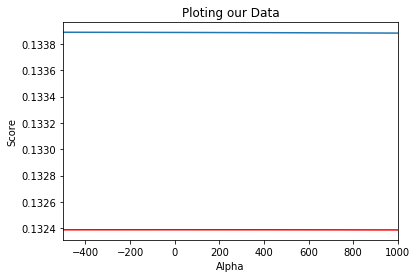

In [16]:
alphaMat = np.array([-500,-300,-200,-100,-0.1,0,0.01,100,200 ,300,500,700,1000])
method = Ridge 
plotingData(alphaMat,X_train,y_train,X_test, y_test,method)

## Lasso regression

In [17]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=0.5, max_iter = 10000).fit(X_train, y_train)

print('Test with lasso')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Test with lasso
lasso regression linear model intercept: 4.640715599888883
lasso regression linear model coeff:
[ 0.          0.         -0.         -0.         -0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.03501456 -0.         -0.         -0.05133807
  0.         -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.     

In [18]:
alphaMat = np.array([-2,-1,-0.5,0.5 ,1, 2])
method = Lasso 
plotingData(alphaMat,X_train,y_train,X_test, y_test,method)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



## confusion matrix

[[30510   220  4094  1398  1433  5062    73  3781  1466  3332]
 [  668  8497  1008   146   460   515     6   536   403  1357]
 [ 5899   500 24284  4700  1965  4006   261  1455  3863  4479]
 [ 2905   316  5655 20487  1459  1927   371   420  4666  2670]
 [ 2053   267  3234  1493 28011  1132    98  6445   985  2415]
 [ 9307    71  2367  1497   958 29043   460  4222  1153  1929]
 [  247     8   737  2713   699   474  1904   406    54   827]
 [ 3504    19   577   173  3747  1613    23 36360    34   969]
 [ 2027   155  3372  2258   563  2315    57   938 32641  2937]
 [ 6659   798  6287  1659  2830  3038   112  1539  2447 26696]]


<IPython.core.display.Javascript object>


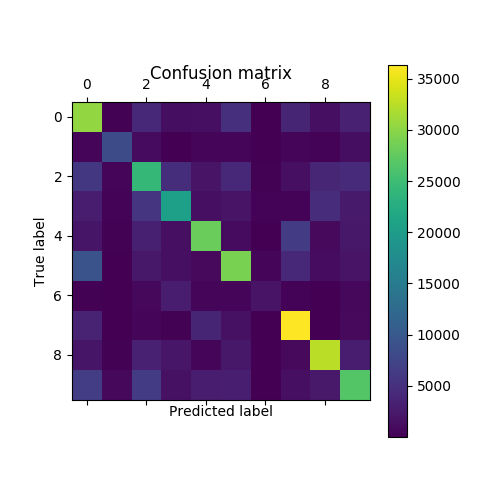

In [22]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Precision and Recall Score

In [23]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
# For each class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y_test_new = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
y_score =  label_binarize(y_pred, classes=[0, 1, 2,3,4,5,6,7,8,9])
n_classes = y_test_new.shape[1]
precision = dict()
recall = dict()
average_precision = dict()
print(n_classes)
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_new[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(y_test_new[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_new.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_new, y_score,average="micro")


10


## Report of Precision and Recall

In [24]:
%matplotlib notebook
import warnings; warnings.simplefilter('ignore')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.48      0.59      0.53     51369
          1       0.78      0.62      0.70     13596
          2       0.47      0.47      0.47     51412
          3       0.56      0.50      0.53     40876
          4       0.66      0.61      0.63     46133
          5       0.59      0.57      0.58     51007
          6       0.57      0.24      0.33      8069
          7       0.65      0.77      0.71     47019
          8       0.68      0.69      0.69     47263
          9       0.56      0.51      0.54     52065

avg / total       0.59      0.58      0.58    408809



## Precision-recall curves

<IPython.core.display.Javascript object>


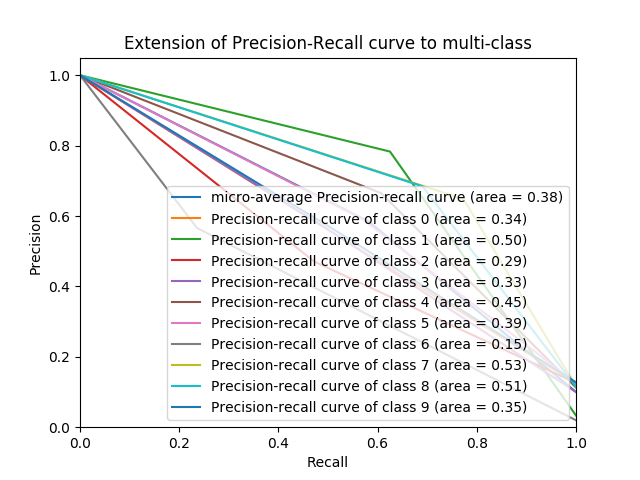

In [25]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()

## plot Precision Recall for specific class

<IPython.core.display.Javascript object>


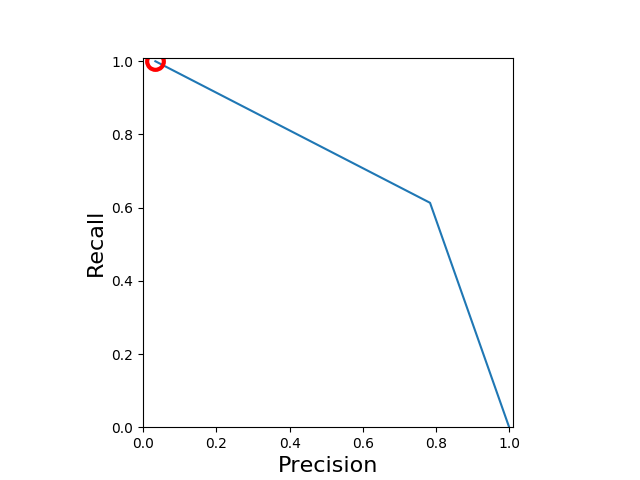

In [15]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_new[:,1], y_score[:,1])
# index of the closest threshold value to zero 
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

## ROC curve

In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_new[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw = 2

[ 0.          0.01041775  0.03592508  0.23076747  0.28237457  0.29412351
  0.33969912  0.33996607  0.38109417  0.4904703   0.57643715  1.        ]
[ 0.          0.18823542  0.64912014  0.85623746  0.91109577  0.92358489
  0.97203172  0.9723155   1.01603464  1.13230139  1.22368409  2.        ]
[ 0.          0.19822596  0.68357201  1.07754163  1.18189074  1.20564699
  1.29780047  1.29834026  1.38150091  1.6026585   1.7020499   3.        ]
[ 0.          0.21591239  0.74456275  1.46932027  1.66128379  1.70498646
  1.80101946  1.80158197  1.88824356  2.11871154  2.22542068  4.        ]
[ 0.          0.24255761  0.83644744  2.05954852  2.25506918  2.29958167
  2.39875607  2.39933698  2.48883342  2.72684041  2.839475    5.        ]
[ 0.          0.25936776  0.89441636  2.43191625  2.71071042  2.77418106
  2.94689652  2.9474981   3.04017891  3.28665439  3.40594502  6.        ]
[ 0.          0.42122177  1.05973796  2.62372567  2.90953557  2.97460341
  3.15351465  3.15415252  3.25242448  3.51376

<IPython.core.display.Javascript object>


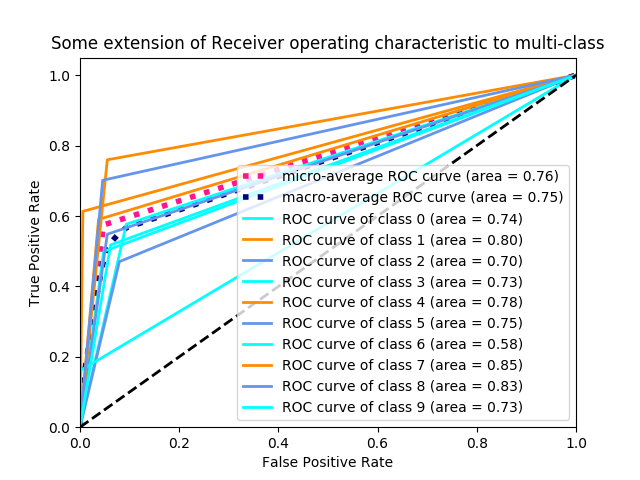

In [19]:
lw = 2
def cycle(iterable):
    # cycle('ABCD') --> A B C D A B C D A B C D ...
    saved = []
    for element in iterable:
        yield element
        saved.append(element)
    while saved:
        for element in saved:
              yield element

# Compute macro-average ROC curve and ROC area
from scipy import interp
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
#print(all_fpr)
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    print(mean_tpr)
    
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()